# KNN TEST

In [1]:
from utils.hog import HOGDescriptor
import os
import cv2
import numpy as np
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from utils.hog import HOGDescriptor
import joblib
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Initialize HOG descriptor with optimized parameters for 48x48 images
hog_descriptor = HOGDescriptor()

In [3]:
# Function to load images and compute HOG descriptors
def load_images_from_folder(folder):
    hog_features = []
    labels = []
    for label in os.listdir(folder):
        if label not in ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]:
            continue  # Skip any non-relevant files or directories
        label_idx = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"].index(label)
        path = os.path.join(folder, label)
        print(f'start feature extraction {label}')
        for filename in tqdm(os.listdir(path)):
            img_path = os.path.join(path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
            if img is not None:
                hog_feature = hog_descriptor.compute(img)
                hog_features.append(hog_feature)
                labels.append(label_idx)
    return np.array(hog_features), np.array(labels)

### KNN TEST on DATASET 1

In [4]:
test_folder = 'datasets/dataset1/test'

In [5]:
features, labels = load_images_from_folder(test_folder)

start feature extraction angry


100%|██████████| 958/958 [00:00<00:00, 9909.38it/s]


start feature extraction disgust


100%|██████████| 111/111 [00:00<00:00, 11137.72it/s]


start feature extraction fear


100%|██████████| 1024/1024 [00:00<00:00, 9785.06it/s]


start feature extraction happy


100%|██████████| 1774/1774 [00:00<00:00, 10056.15it/s]


start feature extraction neutral


100%|██████████| 1233/1233 [00:00<00:00, 9337.79it/s]


start feature extraction sad


100%|██████████| 1247/1247 [00:00<00:00, 10009.41it/s]


start feature extraction surprise


100%|██████████| 831/831 [00:00<00:00, 10168.05it/s]


In [6]:
model_path = 'knn_hog_expression_classifier_ds1.pkl'
clf = joblib.load(model_path)

In [7]:
# Predict using the trained SVM model
predictions = clf.predict(features)

In [8]:
# Compute metrics
accuracy = accuracy_score(labels, predictions)
precision = precision_score(labels, predictions, average='weighted')
recall = recall_score(labels, predictions, average='weighted')
f1 = f1_score(labels, predictions, average='weighted')

In [9]:
# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print("\nClassification Report:\n", classification_report(labels, predictions))

Accuracy: 0.47617720813597103
Precision: 0.48556886652628545
Recall: 0.47617720813597103
F1 Score: 0.46552890041305817

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.51      0.40       958
           1       0.36      0.49      0.42       111
           2       0.38      0.37      0.37      1024
           3       0.58      0.72      0.64      1774
           4       0.46      0.40      0.43      1233
           5       0.50      0.21      0.30      1247
           6       0.65      0.56      0.60       831

    accuracy                           0.48      7178
   macro avg       0.46      0.46      0.45      7178
weighted avg       0.49      0.48      0.47      7178



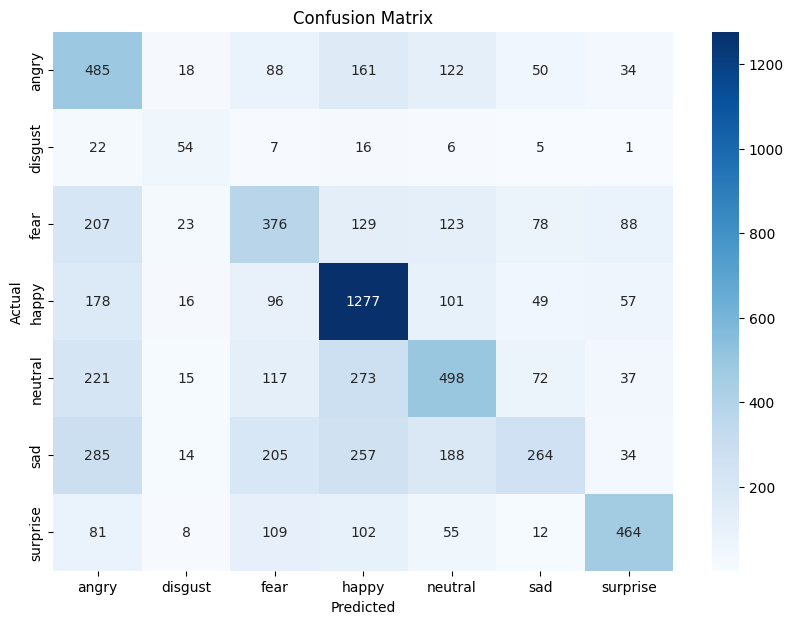

In [10]:
# Confusion matrix
cm = confusion_matrix(labels, predictions)
expressions = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3,  'neutral': 4 ,'sad': 5, 'surprise': 6}

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=expressions.keys(), yticklabels=expressions.keys())
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### KNN TEST on DATASET 2

In [11]:
test_folder = 'datasets/dataset2/test'

In [12]:
features, labels = load_images_from_folder(test_folder)

start feature extraction angry


100%|██████████| 960/960 [00:00<00:00, 9261.57it/s]


start feature extraction disgust


100%|██████████| 111/111 [00:00<00:00, 9280.54it/s]


start feature extraction fear


100%|██████████| 1018/1018 [00:00<00:00, 9727.86it/s]


start feature extraction happy


100%|██████████| 1825/1825 [00:00<00:00, 9625.94it/s]


start feature extraction neutral


100%|██████████| 1216/1216 [00:00<00:00, 8714.78it/s]


start feature extraction sad


100%|██████████| 1139/1139 [00:00<00:00, 9603.31it/s]


start feature extraction surprise


100%|██████████| 797/797 [00:00<00:00, 9872.42it/s]


In [13]:
model_path = 'knn_hog_expression_classifier_ds2.pkl'
clf = joblib.load(model_path)

In [14]:
# Predict using the trained SVM model
predictions = clf.predict(features)

In [15]:
# Compute metrics
accuracy = accuracy_score(labels, predictions)
precision = precision_score(labels, predictions, average='weighted')
recall = recall_score(labels, predictions, average='weighted')
f1 = f1_score(labels, predictions, average='weighted')

In [16]:
# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print("\nClassification Report:\n", classification_report(labels, predictions))

Accuracy: 0.4848570619869799
Precision: 0.49135915172016703
Recall: 0.4848570619869799
F1 Score: 0.47595870907881427

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.48      0.39       960
           1       0.42      0.57      0.48       111
           2       0.38      0.38      0.38      1018
           3       0.59      0.74      0.66      1825
           4       0.45      0.36      0.40      1216
           5       0.52      0.26      0.35      1139
           6       0.63      0.53      0.57       797

    accuracy                           0.48      7066
   macro avg       0.47      0.47      0.46      7066
weighted avg       0.49      0.48      0.48      7066



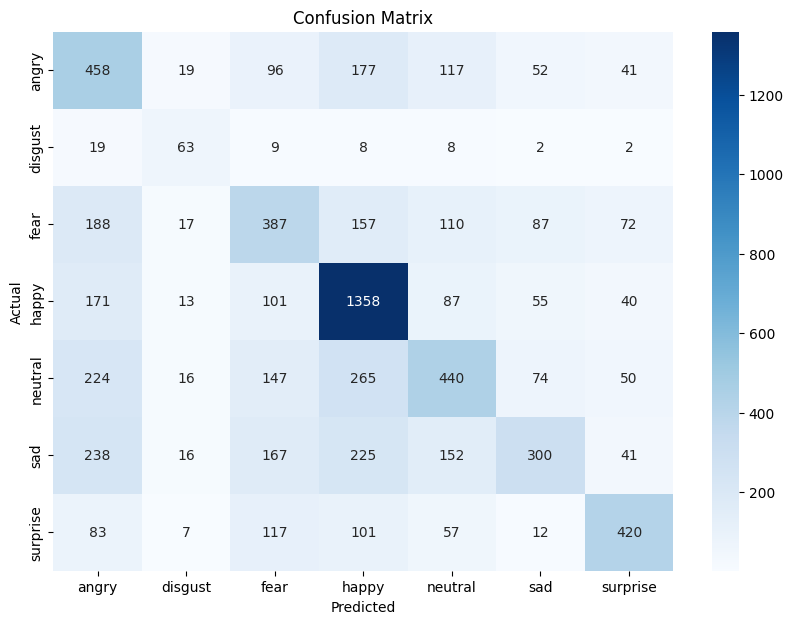

In [17]:
# Confusion matrix
cm = confusion_matrix(labels, predictions)
expressions = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3,  'neutral': 4 ,'sad': 5, 'surprise': 6}

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=expressions.keys(), yticklabels=expressions.keys())
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### CUSTOM TEST

In [35]:
test_image_path = 'bad_and_good_samples/happy4.jpg'
img = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
hog_feature = hog_descriptor.compute(img)
labels = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]
prediction = clf.predict([hog_feature])
print(labels[prediction[0]])

happy


In [36]:
test_image_path = 'bad_and_good_samples/happy1.jpg'
img = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
hog_feature = hog_descriptor.compute(img)
labels = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]
prediction = clf.predict([hog_feature])
print(labels[prediction[0]])

neutral
